In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!pip install geopandas
import pandas as pd
import geopandas as gpd

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.5 MB/s eta 0:00:00


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [ ]:
piste = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/bike_ciclabili.zip')

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

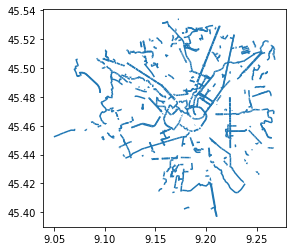

In [ ]:
piste.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
quartieri = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/ds964_nil_wm.zip')

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.8 MB/s eta 0:00:00


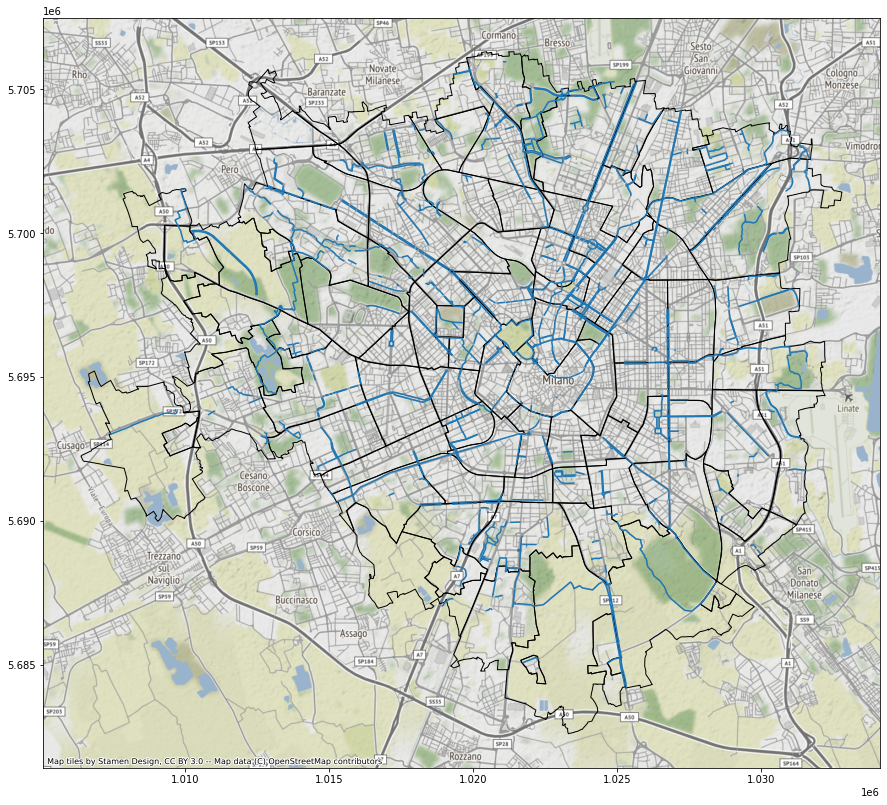

In [ ]:
!pip install contextily
import contextily
quartieri3857 = quartieri.to_crs(3857)
piste3857 = piste.to_crs(3857)
ax = quartieri3857.plot(figsize=(15,30), facecolor='None', edgecolor='k')
piste3857.plot(ax=ax)
contextily.add_basemap(ax)

In [ ]:
# trovare il quartiere meno esteso
pagolo = quartieri3857[quartieri3857.Shape_Area == max(quartieri3857.Shape_Area)]
pagolo

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
55,85,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144,"POLYGON ((1026043.685 5689768.453, 1026069.001..."


In [ ]:
# trovare il quartiere meno esteso
pigolo = quartieri3857[quartieri3857.Shape_Area == min(quartieri3857.Shape_Area)]
pagolo

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
55,85,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144,"POLYGON ((1026043.685 5689768.453, 1026069.001..."


/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:82: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if is_color_like(value):
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:174: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  collection = PatchCollection(


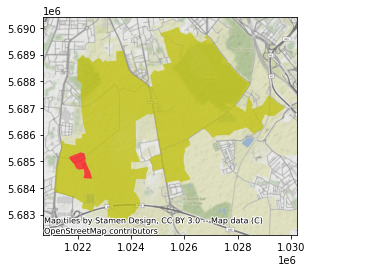

In [ ]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax = pagolo.plot(facecolor='Y', alpha=0.7)
pigolo.plot( figsize=(30,30),facecolor='R',alpha=0.7,ax=ax)
contextily.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [ ]:
affori = quartieri3857[quartieri3857.NIL == 'AFFORI']
affori

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((1021653.210 5703599.076, 1021685.942..."


In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [ ]:
pisteAfforiane = piste3857[piste3857.intersects(affori.geometry.item())]
pisteAfforiane

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
32,9039,1088,VIALE ENRICO FERMI,None,urbana,percorso promiscuo - attraversamento,attraversamento,bidirezionale,attraversamento - generico,36.0,"LINESTRING (1021818.103 5702817.130, 1021868.7..."
252,9299,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,172.0,"LINESTRING (1022245.849 5701530.613, 1022215.6..."
255,9302,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,211.0,"LINESTRING (1022108.972 5701729.869, 1022083.1..."
294,9342,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,455.0,"LINESTRING (1021963.252 5701985.708, 1021960.3..."
668,9716,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,33.0,"LINESTRING (1021829.043 5702622.250, 1021783.4..."
...,...,...,...,...,...,...,...,...,...,...,...
2982,12754,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,8.0,"LINESTRING (1021580.067 5702008.160, 1021585.2..."
2983,12755,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,46.0,"LINESTRING (1021551.115 5702067.311, 1021580.0..."
2984,12756,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,20.0,"LINESTRING (1021538.926 5702092.978, 1021551.1..."
2985,12757,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,40.0,"LINESTRING (1021513.304 5702144.847, 1021538.9..."


In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

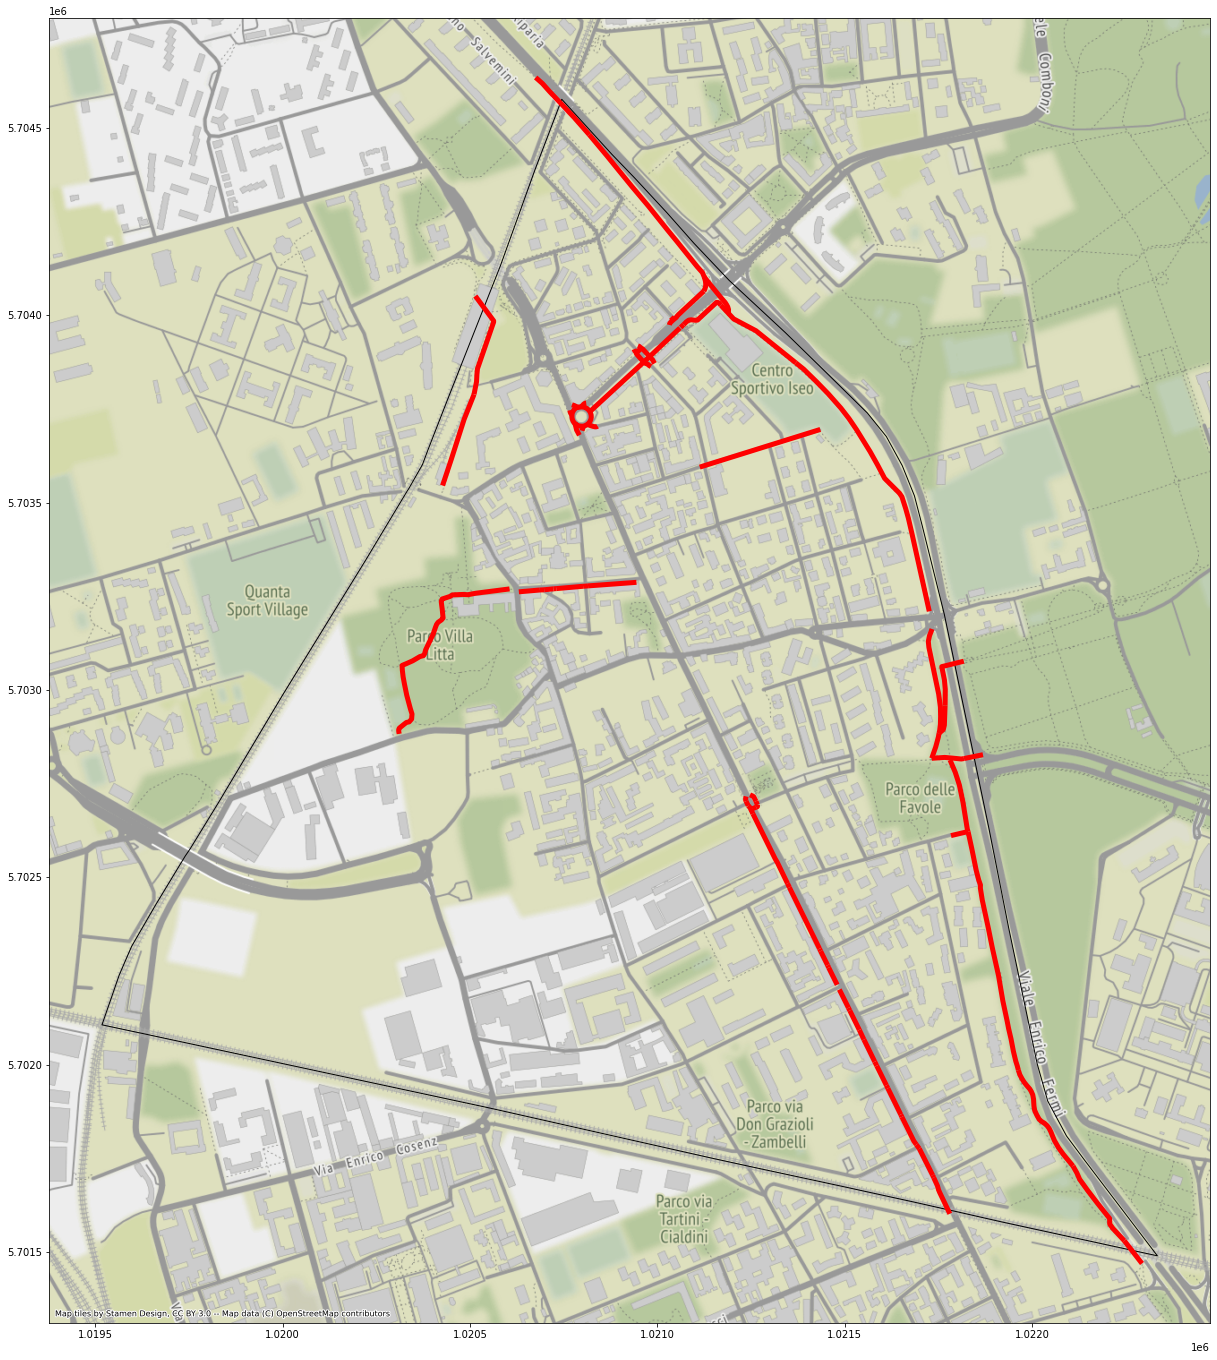

In [ ]:
ax=pisteAfforiane.plot( edgecolor='R', figsize=(48, 24), linewidth=5)
affori.plot(ax=ax, edgecolor='k', facecolor='None')
contextily.add_basemap(ax)